# Modules

In [1]:
# test harness for evaluating models on the cifar10 dataset
import sys
from matplotlib import pyplot
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.optimizers import SGD

Using TensorFlow backend.


# Functions

In [0]:
# load train and test dataset
def load_dataset():

    # load dataset
    (trainX, trainY), (testX, testY) = cifar10.load_data()

    # one hot encode target values
    trainY = to_categorical(trainY)
    testY = to_categorical(testY)

    return trainX, trainY, testX, testY

In [0]:
# scale pixels
def prep_pixels(train, test):

    # convert from integers to floats
    train_norm = train.astype('float32')
    test_norm = test.astype('float32')

    # normalize to range 0-1
    train_norm = train_norm / 255.0
    test_norm = test_norm / 255.0

    # return normalized images
    return train_norm, test_norm

In [0]:
# plot diagnostic learning curves
def summarize_diagnostics(history):

    # plot loss
    pyplot.subplot(211)
    pyplot.title('Cross Entropy Loss')
    pyplot.plot(history.history['loss'], color='blue', label='train')
    pyplot.plot(history.history['val_loss'], color='orange', label='test')

    # plot accuracy
    pyplot.subplot(212)
    pyplot.title('Classification Accuracy')
    pyplot.plot(history.history['acc'], color='blue', label='train')
    pyplot.plot(history.history['val_acc'], color='orange', label='test')

    pyplot.show()

    # save plot to file
    # filename = sys.argv[0].split('/')[-1]
    # pyplot.savefig(filename + '_plot.png')

    pyplot.close()

In [0]:
# run the test harness for evaluating a model
def run_test_harness(model, epochs=100, piece=5000):
    
    # load dataset
    trainX, trainY, testX, testY = load_dataset()

    # slicing the dataset
    trainX, trainY, testX, testY = trainX[:piece], trainY[:piece], testX[:piece], testY[:piece]

    # prepare pixel data
    trainX, testX = prep_pixels(trainX, testX)

    # fit model
    history = model.fit(trainX, trainY, epochs=epochs, batch_size=64, validation_data=(testX, testY), verbose=0)

    # evaluate model
    _, acc = model.evaluate(testX, testY, verbose=0)

    print('> %.3f' % (acc * 100.0))
    # learning curves

    summarize_diagnostics(history)

# Models

In [0]:
def model1():

	model = Sequential()

	# 3-block vgg style architecture
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))

	# example output part of the model
	model.add(Flatten())
	model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(10, activation='softmax'))

	# compile model
	opt = SGD(lr=0.001, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

	return model

In [0]:
# a model with dropout layers

def model2():

	model = Sequential()

	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.2))

	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.2))

	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.2))

	model.add(Flatten())
	model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dropout(0.2))
	model.add(Dense(10, activation='softmax'))

	opt = SGD(lr=0.001, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

	return model

# Tests

## Model 1

> 31.900


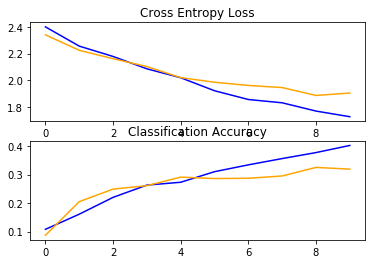

CPU times: user 5.53 s, sys: 1.01 s, total: 6.55 s
Wall time: 6.69 s


In [16]:
%%time

run_test_harness( model1() , epochs=10 , piece=1000 )

> 38.600


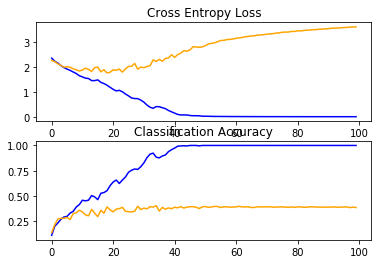

CPU times: user 33.1 s, sys: 6.91 s, total: 40 s
Wall time: 42.3 s


In [9]:
%%time

run_test_harness( model1() , epochs=100 , piece=1000 )

> 56.120


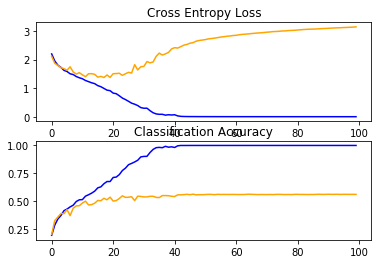

CPU times: user 2min 40s, sys: 32.3 s, total: 3min 12s
Wall time: 3min 24s


In [10]:
%%time

run_test_harness( model1() , epochs=100 , piece=5000 )

> 73.170


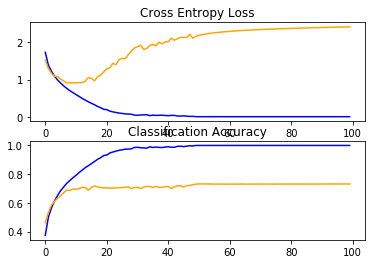

CPU times: user 21min 3s, sys: 5min 43s, total: 26min 47s
Wall time: 27min 35s


In [11]:
%%time

run_test_harness( model1() , epochs=100 , piece=50000 )

## Model 2

> 15.900


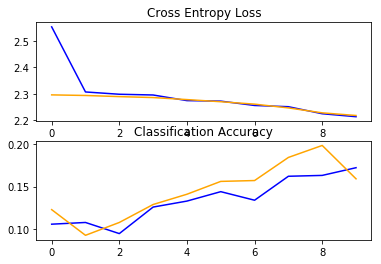

CPU times: user 6.15 s, sys: 1.09 s, total: 7.23 s
Wall time: 7.36 s


In [17]:
%%time
    
run_test_harness( model2() , epochs=10 , piece=1000 )

> 44.600


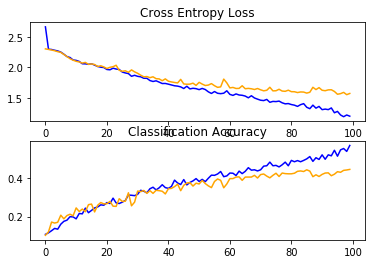

CPU times: user 35.7 s, sys: 7.38 s, total: 43.1 s
Wall time: 45.9 s


In [13]:
%%time

run_test_harness( model2() , epochs=100 , piece=1000 )

> 59.460


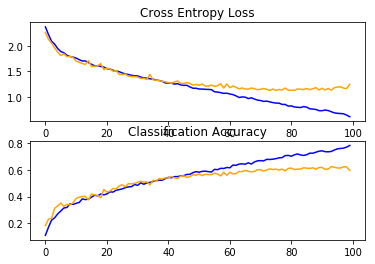

CPU times: user 2min 49s, sys: 33.4 s, total: 3min 23s
Wall time: 3min 38s


In [14]:
%%time

run_test_harness( model2() , epochs=100 , piece=5000 )

> 82.750


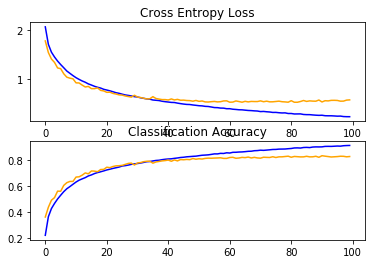

CPU times: user 22min 49s, sys: 5min 16s, total: 28min 6s
Wall time: 28min 59s


In [15]:
%%time

run_test_harness( model2() , epochs=100 , piece=50000 )